# Importing Packages

In [2]:
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL

# Data Importing

In [3]:
data_dir = "/kaggle/input/fordataaugmentation"
data_dir = pathlib.Path(data_dir)
print(data_dir)

/kaggle/input/fordataaugmentation


/kaggle/input/fordataaugmentation/C50/C50_87.jpg


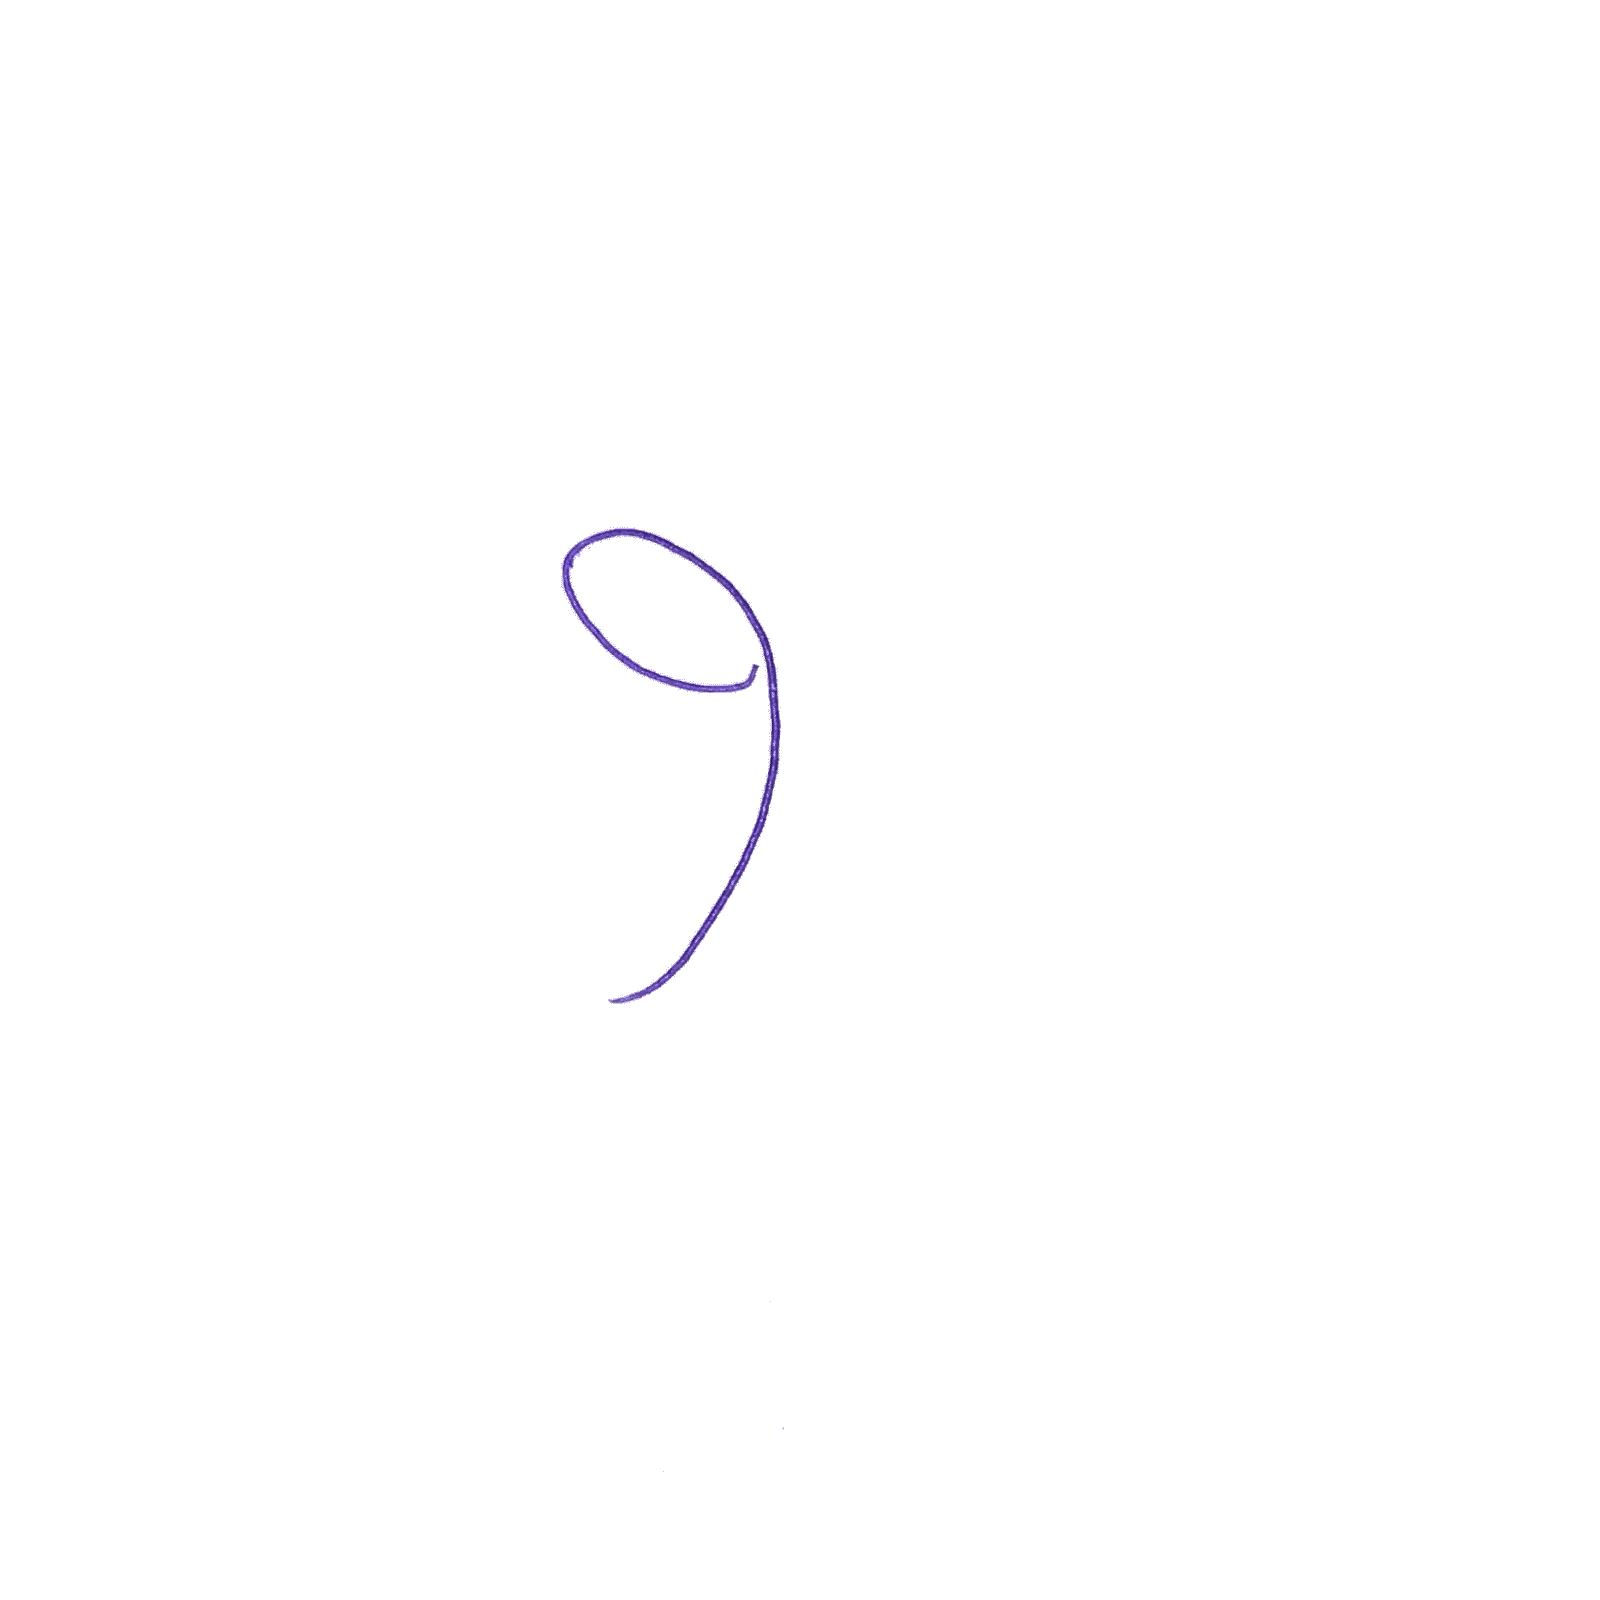

In [4]:
ch1 = list(data_dir.glob('C50/*'))
print(ch1[0])
PIL.Image.open(str(ch1[0]))

# Data Augmentation

In [5]:
import os
from PIL import Image
from keras.preprocessing.image import img_to_array, array_to_img
import numpy as np
# Define the output directory for augmented images
output_dir = "/kaggle/working/augmented_images" 
output_dir = pathlib.Path(output_dir)
output_dir.mkdir(exist_ok=True)

# Define the augmentation parameters 
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='constant',
    cval=255  )

# Iterate through each subdirectory (e.g., C55, C56, etc.)
for subdir in os.listdir(data_dir):
    sub_dir_path = data_dir / subdir
    if sub_dir_path.is_dir():
        # Create a directory for augmented images
        augmented_dir_path = output_dir / subdir
        augmented_dir_path.mkdir(exist_ok=True)
        
        # Get a list of image filenames in the subdirectory
        image_files = [f for f in sub_dir_path.glob('*') if f.is_file()]
        
        # Augment and save images in the subdirectory
        for image_file in image_files:
            img = Image.open(image_file)
            
            # Convert RGBA images to RGB
            if img.mode == 'RGBA':
                img = img.convert('RGB')
            
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)
            
            # Generate augmented images
            augmented_images = []
            num_augmented_images = 5  # Number of augmented images to generate
            for batch in datagen.flow(x, batch_size=1):
                augmented_images.append(batch[0])
                if len(augmented_images) >= num_augmented_images:
                    break
            
            # Save original image
            original_img_path = augmented_dir_path / image_file.name
            img.save(original_img_path)
            
            # Save augmented images
            for i, augmented_img in enumerate(augmented_images):
                augmented_img_path = augmented_dir_path / '{}_augmented_{}.jpg'.format(image_file.stem, i)
                array_to_img(augmented_img).save(augmented_img_path)